In [1]:
import numpy as np
import scipy as sc
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import glob as glob
import subprocess as sp

In [2]:
from motors.simulation import Simulation
from motors.aesthetics import prepare_plot
from motors.aesthetics import paper_plot

In [3]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
mpl.rc('text', usetex=True)
cmap = sns.color_palette("Paired", 10)
prepare_plot()

# Write a `cpptraj` script to analyze the 1 us trajectory of the $\chi$2 angle of Threonine 175 of ADK in 100 ns chunks

In [236]:
for simulation_time in np.arange(100, 1100, 100):
    
    print(f'Writing script to extract the first {simulation_time} ns...')
    trajectories = ''
    # Each NetCDF trajectory is 10 ns...
    for nc_file in range(1, int(simulation_time)//int(10) + 1):
        trajectories = trajectories + 'trajin ../traj.{0:04d}.nc\n'.format(nc_file)
        
    script = '''
    parm full-protein.prmtop
    {}
    dihedral hocc :175@HG1 :175@OG1 :175@CB :175@CA
    hist hocc,-180,180,6,* norm out chi2THR175-{}ns.dat prec 11.9
    run
    quit
    '''.format(trajectories, simulation_time)
    
    with open('chi2THR175-{}ns.in'.format(simulation_time), 'w') as text_file:
        text_file.write(script)

Writing script to extract the first 100 ns...
Writing script to extract the first 200 ns...
Writing script to extract the first 300 ns...
Writing script to extract the first 400 ns...
Writing script to extract the first 500 ns...
Writing script to extract the first 600 ns...
Writing script to extract the first 700 ns...
Writing script to extract the first 800 ns...
Writing script to extract the first 900 ns...
Writing script to extract the first 1000 ns...


In [237]:
for simulation_time in np.arange(500, 1100, 100):
    
    half_time = simulation_time / 2
    print(f'Writing script to extract the first {half_time} ns of {simulation_time} ns total...')
        
    trajectories = ''
    for nc_file in range(1, int(half_time)//int(10) + 1):
        trajectories = trajectories + 'trajin ../traj.{0:04d}.nc\n'.format(nc_file)
        
    script = '''
    parm full-protein.prmtop
    {}
    dihedral hocc :175@HG1 :175@OG1 :175@CB :175@CA
    hist hocc,-180,180,6,* norm out chi2THR175-{}ns-first-half.dat prec 11.9
    run
    quit
    '''.format(trajectories, simulation_time)
    
    with open('chi2THR175-{}ns-first-half.in'.format(simulation_time), 'w') as text_file:
        text_file.write(script)
    
    print(f'Writing script to extract the second {half_time} ns of {simulation_time} ns total...')
    trajectories = ''
    for nc_file in range(int(half_time)//int(10), int(simulation_time)//int(10) + 1):
        trajectories = trajectories + 'trajin ../traj.{0:04d}.nc\n'.format(nc_file)
        
    script = '''
    parm full-protein.prmtop
    {}
    dihedral hocc :175@HG1 :175@OG1 :175@CB :175@CA
    hist hocc,-180,180,6,* norm out chi2THR175-{}ns-second-half.dat prec 11.9
    run
    quit
    '''.format(trajectories, simulation_time)
    
    with open('chi2THR175-{}ns-second-half.in'.format(simulation_time), 'w') as text_file:
        text_file.write(script)


Writing script to extract the first 250.0 ns of 500 ns total...
Writing script to extract the second 250.0 ns of 500 ns total...
Writing script to extract the first 300.0 ns of 600 ns total...
Writing script to extract the second 300.0 ns of 600 ns total...
Writing script to extract the first 350.0 ns of 700 ns total...
Writing script to extract the second 350.0 ns of 700 ns total...
Writing script to extract the first 400.0 ns of 800 ns total...
Writing script to extract the second 400.0 ns of 800 ns total...
Writing script to extract the first 450.0 ns of 900 ns total...
Writing script to extract the second 450.0 ns of 900 ns total...
Writing script to extract the first 500.0 ns of 1000 ns total...
Writing script to extract the second 500.0 ns of 1000 ns total...


This part is not portable because the path is hardcoded, but the raw MD data isn't available either.

In [234]:
for simulation_time in np.arange(100, 1100, 100):
    
    apo = '/home/dslochower/kirkwood/large-file-storage/projects/nonequilibrium/md-data/adenylate-kinase/apo-4ake/analysis/'
    bound = '/home/dslochower/kirkwood/large-file-storage/projects/nonequilibrium/md-data/adenylate-kinase/ap5-3hpq/analysis/'

    p = sp.Popen('cp chi2THR175-{}ns*.in {}'.format(simulation_time, apo), shell=True)
    p = sp.Popen('cp chi2THR175-{}ns*.in {}'.format(simulation_time, bound), shell=True)
    # p = sp.Popen('rm chi2THR175-{}ns*.in'.format(simulation_time), shell=True)
    
    print(f'Extracting the first {simulation_time} ns...')
    p = sp.Popen('cpptraj -i ' + 'chi2THR175-{}ns.in'.format(simulation_time), 
                 cwd=apo, shell=True).wait()    
    p = sp.Popen('cpptraj -i ' + 'chi2THR175-{}ns.in'.format(simulation_time), 
                 cwd=bound, shell=True).wait()    

for simulation_time in np.arange(500, 1100, 100):

    print(f'Extracting the first half of {simulation_time} ns...')
    p = sp.Popen('cpptraj -i ' + 'chi2THR175-{}ns-first-half.in'.format(simulation_time), 
                 cwd=apo, shell=True).wait()    
    p = sp.Popen('cpptraj -i ' + 'chi2THR175-{}ns-first-half.in'.format(simulation_time), 
                 cwd=bound, shell=True).wait()    
    print(f'Extracting the second half of {simulation_time} ns...')
    p = sp.Popen('cpptraj -i ' + 'chi2THR175-{}ns-second-half.in'.format(simulation_time), 
                 cwd=apo, shell=True).wait()    
    p = sp.Popen('cpptraj -i ' + 'chi2THR175-{}ns-second-half.in'.format(simulation_time), 
                 cwd=bound, shell=True).wait()    

Extracting the first 100 ns...
Extracting the first 200 ns...
Extracting the first 300 ns...
Extracting the first 400 ns...
Extracting the first 500 ns...
Extracting the first 600 ns...
Extracting the first 700 ns...
Extracting the first 800 ns...
Extracting the first 900 ns...
Extracting the first 1000 ns...
Extracting the first half of 500 ns...
Extracting the second half of 500 ns...
Extracting the first half of 600 ns...
Extracting the second half of 600 ns...
Extracting the first half of 700 ns...
Extracting the second half of 700 ns...
Extracting the first half of 800 ns...
Extracting the second half of 800 ns...
Extracting the first half of 900 ns...
Extracting the second half of 900 ns...
Extracting the first half of 1000 ns...
Extracting the second half of 1000 ns...


In [264]:
apo = '/home/dslochower/kirkwood/large-file-storage/projects/nonequilibrium/md-data/adenylate-kinase/apo-4ake/analysis/'
bound = '/home/dslochower/kirkwood/large-file-storage/projects/nonequilibrium/md-data/adenylate-kinase/ap5-3hpq/analysis/'
p = sp.Popen('mkdir -p dihedral-timeseries', cwd='.', shell=True) 
p = sp.Popen('mkdir -p dihedral-timeseries/apo', cwd='.', shell=True) 
p = sp.Popen('mkdir -p dihedral-timeseries/bound', cwd='.', shell=True)

for simulation_time in np.arange(100, 1100, 100):
    print(f'Copying the first {simulation_time} ns time series...')

    p = sp.Popen('cp {}chi2THR175-{}ns.dat dihedral-timeseries/apo/'.format(apo, simulation_time), 
                 cwd='.', shell=True) 
    p = sp.Popen('cp {}chi2THR175-{}ns.dat dihedral-timeseries/bound'.format(bound, simulation_time), 
                 cwd='.', shell=True) 
    
for simulation_time in np.arange(500, 1100, 100):
    print(f'Copying the first and second half of {simulation_time} ns time series...')
    p = sp.Popen('cp {}chi2THR175-{}ns-first-half.dat dihedral-timeseries/apo/'.format(apo, simulation_time), 
                 cwd='.', shell=True) 
    p = sp.Popen('cp {}chi2THR175-{}ns-second-half.dat dihedral-timeseries/apo/'.format(apo, simulation_time), 
                 cwd='.', shell=True) 
    p = sp.Popen('cp {}chi2THR175-{}ns-first-half.dat dihedral-timeseries/bound'.format(bound, simulation_time), 
                 cwd='.', shell=True) 
    p = sp.Popen('cp {}chi2THR175-{}ns-second-half.dat dihedral-timeseries/bound'.format(bound, simulation_time), 
                 cwd='.', shell=True) 

Copying the first 100 ns time series...
Copying the first 200 ns time series...
Copying the first 300 ns time series...
Copying the first 400 ns time series...
Copying the first 500 ns time series...
Copying the first 600 ns time series...
Copying the first 700 ns time series...
Copying the first 800 ns time series...
Copying the first 900 ns time series...
Copying the first 1000 ns time series...
Copying the first and second half of 500 ns time series...
Copying the first and second half of 600 ns time series...
Copying the first and second half of 700 ns time series...
Copying the first and second half of 800 ns time series...
Copying the first and second half of 900 ns time series...
Copying the first and second half of 1000 ns time series...


# Plot the population as a function of total simulation time

In [265]:
simulation_times = np.arange(100, 1100, 100)
apo_data = np.zeros((len(simulation_times), 60))
bound_data = np.zeros((len(simulation_times), 60))

In [266]:
for index, simulation_time in enumerate(simulation_times):
    data = np.genfromtxt('dihedral-timeseries/apo/' + 'chi2THR175-{}ns.dat'.format(simulation_time))
    apo_data[index] = data[:, 1]
    data = np.genfromtxt('dihedral-timeseries/bound/' + 'chi2THR175-{}ns.dat'.format(simulation_time))
    bound_data[index] = data[:, 1]

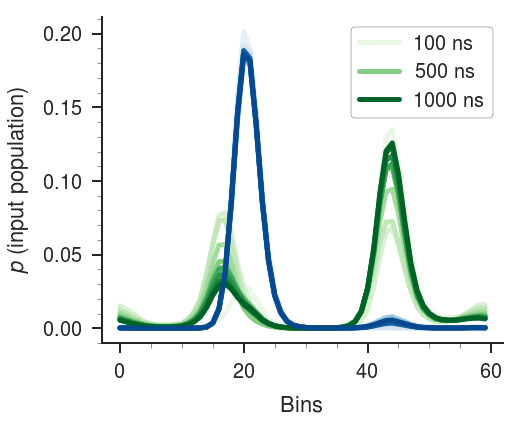

In [267]:
fig, ax1 = plt.subplots(1, 1, figsize=(6*1.2, 6))
apo_colors = sns.color_palette("Greens", len(simulation_times))
bound_colors = sns.color_palette("Blues", len(simulation_times))

for index, simulation_time in enumerate(simulation_times):
    ax1.plot(range(60), apo_data[index], color=apo_colors[index], alpha=1, 
             label='{} ns'.format(simulation_time) if simulation_time in [100, 500, 1000] else None) 
    ax1.plot(range(60), bound_data[index], color=bound_colors[index], alpha=1) 

ax1.set_ylabel(r'$p$ (input population)')
ax1.set_xlabel(r'Bins')
ax1.legend(loc='upper right', frameon=True, framealpha=1.0, edgecolor='k')
paper_plot(fig)

/home/dslochower/data/applications/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


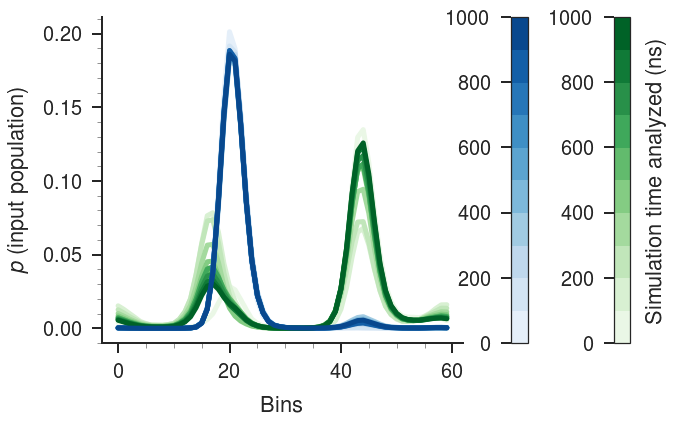

In [268]:
fig, ax1 = plt.subplots(1, 1, figsize=(6*1.2*1.5, 6))
apo_colors = sns.color_palette("Greens", len(simulation_times))
bound_colors = sns.color_palette("Blues", len(simulation_times))

for index, simulation_time in enumerate(simulation_times):
    im1 = ax1.plot(range(60), apo_data[index], color=apo_colors[index], alpha=1) 
    im2 = ax1.plot(range(60), bound_data[index], color=bound_colors[index], alpha=1) 


from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import ListedColormap

sm = plt.cm.ScalarMappable(cmap=ListedColormap(apo_colors),
                           norm=plt.Normalize(vmin=0, vmax=1000))

sm._A = []
bar1 = plt.colorbar(sm, ticks=range(0, 1100, 200))

sm = plt.cm.ScalarMappable(cmap=ListedColormap(bound_colors),
                           norm=plt.Normalize(vmin=0, vmax=1000))
sm._A = []
bar2 = plt.colorbar(sm, pad=0.1, ticks=range(0, 1100, 200))

ax1.set_ylabel(r'$p$ (input population)')
ax1.set_xlabel(r'Bins')
ax1.legend(loc='upper right', frameon=True, framealpha=1.0, edgecolor='k')
paper_plot(fig)
bar1.ax.minorticks_off()
bar2.ax.minorticks_off()
bar1.set_label('Simulation time analyzed (ns)')


Using manual parameters, specify C, offset, and catalytic rate.
Using manual parameters, specify C, offset, and catalytic rate.
Using manual parameters, specify C, offset, and catalytic rate.
Using manual parameters, specify C, offset, and catalytic rate.
Using manual parameters, specify C, offset, and catalytic rate.
Using manual parameters, specify C, offset, and catalytic rate.
Using manual parameters, specify C, offset, and catalytic rate.
Using manual parameters, specify C, offset, and catalytic rate.
Using manual parameters, specify C, offset, and catalytic rate.
Using manual parameters, specify C, offset, and catalytic rate.


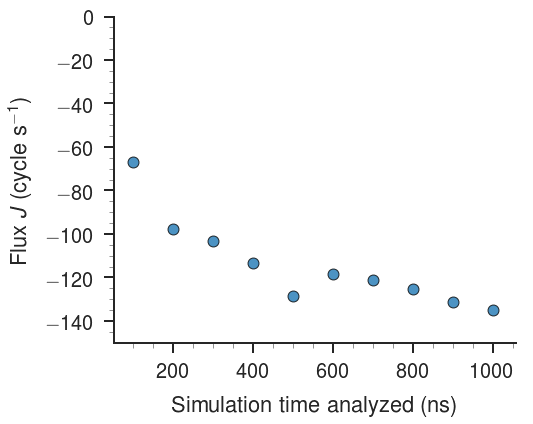

In [269]:
fig, ax1 = plt.subplots(1, 1, figsize=(6*1.2, 6))

for index, simulation_time in enumerate(simulation_times):
    this = Simulation(data_source='manual')
    this.cSubstrate = 10**-3
    
    this.unbound_population = apo_data[index]
    this.bound_population = bound_data[index]
    
    this.C_intersurface = +1.00e+06
    this.offset_factor = 5.7
    this.catalytic_rate = +3.12e+02
    this.simulate()

    ax1.scatter(simulation_time, np.mean(this.flux_u + this.flux_b), marker = 'o', 
                edgecolor = 'k', linewidth = 1.0, alpha=0.8, s=120, c=cmap[1])

ax1.set_ylabel(r'Flux $J$ (cycle s$^{-1}$)')
ax1.set_xlabel(r'Simulation time analyzed (ns)')
ax1.set_ylim([-150, 0])
paper_plot(fig)

In [314]:
simulation_times = np.arange(500, 1100, 100)
apo_first_half = np.zeros((len(simulation_times), 60))
apo_second_half = np.zeros((len(simulation_times), 60))
bound_first_half = np.zeros((len(simulation_times), 60))
bound_second_half = np.zeros((len(simulation_times), 60))


for index, simulation_time in enumerate(simulation_times):
    data = np.genfromtxt('dihedral-timeseries/apo/' + 'chi2THR175-{}ns-first-half.dat'.format(simulation_time))
    apo_first_half[index] = data[:, 1]
    data = np.genfromtxt('dihedral-timeseries/apo/' + 'chi2THR175-{}ns-second-half.dat'.format(simulation_time))
    apo_second_half[index] = data[:, 1]  
    data = np.genfromtxt('dihedral-timeseries/bound/' + 'chi2THR175-{}ns-first-half.dat'.format(simulation_time))
    bound_first_half[index] = data[:, 1]
    data = np.genfromtxt('dihedral-timeseries/bound/' + 'chi2THR175-{}ns-second-half.dat'.format(simulation_time))
    bound_second_half[index] = data[:, 1]

Using manual parameters, specify C, offset, and catalytic rate.
Using manual parameters, specify C, offset, and catalytic rate.
Using manual parameters, specify C, offset, and catalytic rate.
Using manual parameters, specify C, offset, and catalytic rate.
Using manual parameters, specify C, offset, and catalytic rate.
Using manual parameters, specify C, offset, and catalytic rate.
Using manual parameters, specify C, offset, and catalytic rate.
Using manual parameters, specify C, offset, and catalytic rate.
Using manual parameters, specify C, offset, and catalytic rate.
Using manual parameters, specify C, offset, and catalytic rate.
Using manual parameters, specify C, offset, and catalytic rate.
Using manual parameters, specify C, offset, and catalytic rate.
500
600
700
800
900
1000


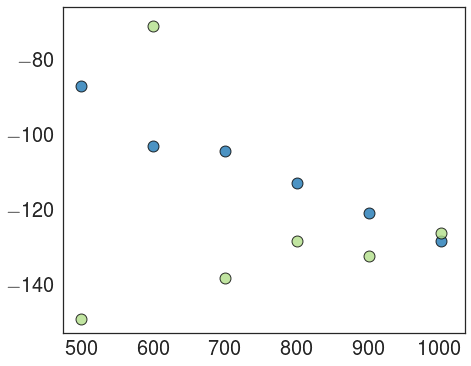

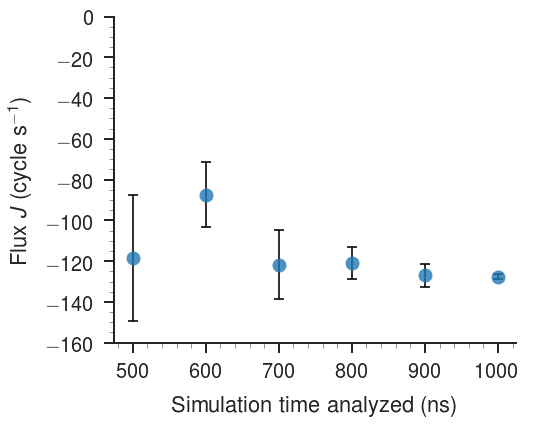

In [316]:
fig, ax1 = plt.subplots(1, 1, figsize=(6*1.2, 6))
first_half_average = np.zeros((len(simulation_times)))
second_half_average = np.zeros((len(simulation_times)))

simulation_times = np.arange(500, 1100, 100)

for index, simulation_time in enumerate(simulation_times):
    this = Simulation(data_source='manual')
    this.cSubstrate = 10**-3
    
    this.unbound_population = apo_first_half[index]
    this.bound_population = bound_first_half[index]
    
    this.C_intersurface = +1.00e+06
    this.offset_factor = 5.7
    this.catalytic_rate = +3.12e+02
    this.simulate()
    
    first_half_average[index] = np.mean(this.flux_u + this.flux_b)

    ax1.scatter(simulation_time, np.mean(this.flux_u + this.flux_b), marker = 'o', 
                edgecolor = 'k', linewidth = 1.0, alpha=0.8, s=120, c=cmap[1])

    
    this = Simulation(data_source='manual')
    this.cSubstrate = 10**-3
    
    this.unbound_population = apo_second_half[index]
    this.bound_population = bound_second_half[index]
    
    this.C_intersurface = +1.00e+06
    this.offset_factor = 5.7
    this.catalytic_rate = +3.12e+02
    this.simulate()

    second_half_average[index] = np.mean(this.flux_u + this.flux_b)
    
    ax1.scatter(simulation_time, np.mean(this.flux_u + this.flux_b), marker = 'o', 
                edgecolor = 'k', linewidth = 1.0, alpha=0.8, s=120, c=cmap[2])

fig, ax1 = plt.subplots(1, 1, figsize=(6*1.2, 6))
for index, simulation_time in enumerate(simulation_times):
    print(simulation_time)
    hi = max(first_half_average[index], second_half_average[index])
    lo = min(first_half_average[index], second_half_average[index])
    avg = np.average([first_half_average[index], second_half_average[index]])
    
    ax1.errorbar(simulation_time, avg, yerr=[hi-avg],
                 ecolor='k', elinewidth=2, capsize=5, capthick=2,
                 marker='o', linewidth = 1.0, markersize=14, alpha=0.8, c=cmap[1])
    
ax1.set_ylabel(r'Flux $J$ (cycle s$^{-1}$)')
ax1.set_xlabel(r'Simulation time analyzed (ns)')
ax1.set_ylim([-160, 0])
paper_plot(fig)